# Lending Club - case study


### Business Objective:

Identify predictors of loan default so that at the time of loan application, we can use those variables for approval/ rejection of the loan.   


In [1]:
#import the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [2]:
# Read loan.csv file
# DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.

loan=pd.read_csv("loan.csv", low_memory=False) 
loan.shape

(39717, 111)

In [3]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data cleaning

#### Drop columns :

    1. Drop columns which have 100% Null values
    2. Drop column which have only one unique value

In [4]:
#getting percentage of missing values
round(100*loan.isnull().sum()/len(loan.index),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [5]:
# many columns have 100 % NUll values

sum(round(100*loan.isnull().sum()/len(loan.index),2) ==100 )


54

Nearly half of the dataframe contains Null values.

In [6]:
# Removing all columns which have 100% NULL 
loan = loan.dropna(how = 'all',axis=1)
loan.shape

(39717, 57)

In [7]:
# Remove columns with only one unique values 

loan= loan.loc[:,loan.nunique()!=1]
loan.shape

(39717, 48)

In [8]:
# Analyze columns based on % of null values

NULL_analysis = round(100*loan.isnull().sum()/len(loan.index),2)
NULL_analysis[NULL_analysis!=0]

emp_title                  6.19
emp_length                 2.71
desc                      32.58
title                      0.03
mths_since_last_delinq    64.66
mths_since_last_record    92.99
revol_util                 0.13
last_pymnt_d               0.18
next_pymnt_d              97.13
last_credit_pull_d         0.01
pub_rec_bankruptcies       1.75
dtype: float64

#### Drop columns based on NULL value
      1.Drop columns with more than 60% missing values .
         [mths_since_last_record ,next_pymnt_d ,mths_since_last_delinq ]
      2.Loan description column which has long text 
           [desc]
       

In [9]:
loan = loan.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d','desc'],axis=1)
loan.shape

(39717, 44)

#### Remove NULL values :
    
The percentage of NULL value are relatively low , thus can be dropped .

In [10]:
# Remove NULL values 

loan = loan[~loan.pub_rec_bankruptcies.isnull()]
loan = loan[~loan.last_credit_pull_d.isnull()]
loan = loan[~loan.last_pymnt_d.isnull()]
loan = loan[~loan.emp_length.isnull()]
loan = loan[~loan.title.isnull()]
loan = loan[~loan.emp_title.isnull()]
loan = loan[~loan.revol_util.isnull()]

loan.shape 

(36433, 44)

In [11]:
#No null values

loan.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title                  0
emp_length                 0
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
purpose                    0
title                      0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
out_prncp                  0
out_prncp_inv              0
total_pymnt                0
total_pymnt_in

In [12]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

# Data Analysis :
There are broadly three types of variables 
1. related to the applicant 
    (demographic variables such as age, occupation,employment details etc.)
2. loan characteristics 
    (amount of loan, interest rate, purpose of loan etc.)
3. Customer behaviour variables 
    (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.    

#### Drop Customer behaviour variables :

Customer behaviour variables are generated after the loan is approved , thus can not be used for this analysis.



In [13]:
# list of Customer behaviour variables

cust_behaviour = ['delinq_2yrs','revol_bal','revol_util','last_credit_pull_d', 'last_pymnt_d','last_pymnt_amnt',
                 'collection_recovery_fee' ,'recoveries','inq_last_6mths','out_prncp','out_prncp_inv',
                 'total_pymnt' ,'total_pymnt_inv' , 'total_rec_int' ,'total_rec_late_fee' , 'total_rec_prncp',
                 'earliest_cr_line','open_acc', 'total_acc']

In [14]:
# drop Customer behaviour variables from the loan dataframe 

loan = loan .drop (cust_behaviour ,axis =1)
loan.shape

(36433, 25)

#### Drop columns which are not needed for the analysis :
  id , member_id ,
  url ,
  title ,
  zip_code

In [15]:
# Remove columns which are not needed for the analysis

loan = loan .drop( ['id','member_id','url','zip_code','title'],axis=1)
loan.shape

(36433, 20)

## Target Variable :
Here , loan_status is the target variable.

In [16]:
# target variable = loan_status
loan.loan_status.value_counts()


Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

'Current' can be removed as these loans are neither fully paid nor defaulted

'Fully paid' and 'Charged-off' are required.Assign 0 and 1 to those categories.
This helps in finding 'Default rate'.

Default rate = number of defaulted loans / Total number of loans . Default rate varies across different variables.


In [17]:
# drop Current category and create a new dataframe 
# loan_Default - new dataframe

loan_Default=loan[loan['loan_status'] !='Current'].reset_index(drop=True)

loan_Default.shape

(35367, 20)

In [18]:
# change the categorical variable into numeric -> Charged Off = 1 ,Fully Paid =0 .this helps in finding default rate

loan_Default['loan_status'] = loan_Default.loan_status.apply(lambda x:1 if x=='Charged Off' else 0).astype('int')
loan_Default.loan_status.value_counts()

0    30424
1     4943
Name: loan_status, dtype: int64

In [19]:
loan_Default.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'pub_rec',
       'pub_rec_bankruptcies'],
      dtype='object')

### Univariate Analysis

#### Variables taken for this Analysis:
    
1. term - number of payments on the loan 
2. loan_amnt - amount of the loan applied for by the borrower
3. int_rate - Interest Rate on the loan
4. grade - loan grades
5. installment - The monthly payment owed by the borrower if the loan originates
6. home_ownership -  home ownership status provided by the borrower
7. verification_status - Indicates if income was verified or not
8. issue_d_year - year in which loan was issued
9. issue_d_month -  month in which loan was issued
10. annual_inc -  annual income provided by the borrower 
11. dti - debt to income ratio
12. pub_rec_bankruptcies - Number of public record bankruptcies
13. emp_title - Title given by borrower
14. emp_length - work experience
15. sub_grade - loan sub grades
16. annual_inc - annual income of the borrower
17. purpose - purpose of the loan
18. addr_state - state given by the borrower
19. pub_rec_bankruptcies

Analyze - loan_amt:

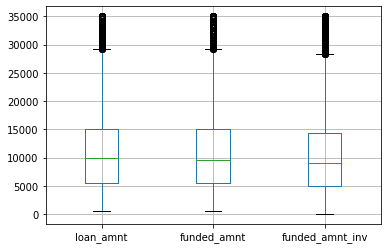

In [20]:
# variable - loan_amt 

loan_Default.boxplot(['loan_amnt','funded_amnt', 'funded_amnt_inv'])

mean is approximately equal for 'loan_amnt','funded_amnt', 'funded_amnt_inv' . so choose only loan_amnt for the analysis .


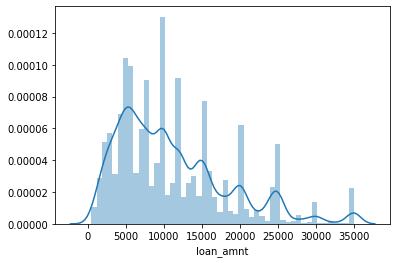

In [21]:
sns.distplot(loan_Default['loan_amnt'])
plt.show()

 Bin the loan_amnt into low ,medium , high and very high.

In [22]:
# creating bins for loan_amnt
def loan_amnt_bin(x):
    if x<= 5000:
        return 'low'
    elif x>5000 and x<=10000:
        return 'medium'
    elif x>10000 and x<=15000:
        return 'high'
    else:
        return 'very high'
    
    
loan_Default['loan_amnt'] = loan_Default['loan_amnt'].apply(lambda x:loan_amnt_bin(x))   
loan_Default.loan_amnt.value_counts()

medium       11748
low           8432
very high     7987
high          7200
Name: loan_amnt, dtype: int64

Analyse - int_rate

1. remove % and change the dtype
2. create bins

In [23]:
# Removing % char from int_rate

loan_Default['int_rate'] = loan_Default['int_rate'].apply(lambda x:x.rstrip('%')).astype('float')
loan_Default.int_rate.dtype

dtype('float64')

In [24]:
# creating bins for int_rate
def rate_bin(x):
    if x<= 10:
        return 'low'
    elif x>10 and x<=15:
        return 'medium'
    elif x>15 and x<=20:
        return 'high'
    else:
        return 'very high'
    
    
loan_Default['int_rate'] = loan_Default['int_rate'].apply(lambda x:rate_bin(x))  
 
loan_Default.int_rate.value_counts()

medium       16769
low          11101
high          6769
very high      728
Name: int_rate, dtype: int64

Analyse - installment

In [25]:
# create bins for installment 

def inst_bin(x):
    if x<= 300:
        return 'low'
    elif x>300 and x<=600:
        return 'medium'
    elif x>600 and x<=900:
        return 'high'
    else:
        return 'very high'
    
    
loan_Default['installment'] = loan_Default['installment'].apply(lambda x:inst_bin(x))   

loan_Default.installment.value_counts()

low          18764
medium       12767
high          3367
very high      469
Name: installment, dtype: int64

In [26]:
# creating bins for annual_inc
def inc_bin(x):
    if x<= 40000:
        return 'low'
    elif x>40000 and x<=60000:
        return 'medium'
    elif x>60000 and x<=80000:
        return 'high'
    else:
        return 'very high'
    
    
loan_Default['annual_inc'] = loan_Default['annual_inc'].apply(lambda x:inc_bin(x)) 

loan_Default.annual_inc.value_counts()

medium       10454
very high     9263
low           8487
high          7163
Name: annual_inc, dtype: int64

Extract month and year from issue_d.

In [27]:
# Change issue_d to date month year format
loan_Default['issue_d'] = pd.to_datetime(loan_Default.issue_d, format='%b-%y')
loan_Default.issue_d.head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [28]:
# Extracting year and month

loan_Default['issue_d_month'] = loan_Default['issue_d'].dt.month
loan_Default['issue_d_year'] = loan_Default['issue_d'].dt.year
loan_Default.issue_d_year.value_counts()

2011    19090
2010    10795
2009     4423
2008     1053
2007        6
Name: issue_d_year, dtype: int64

In [29]:
loan_Default.issue_d_month.value_counts()

12    3820
11    3678
10    3436
9     3276
8     3188
7     3115
6     2977
5     2745
4     2669
3     2395
1     2048
2     2020
Name: issue_d_month, dtype: int64

In [30]:
# creating bins for dti
def dti_bin(x):
    if x<= 10:
        return 'low'
    elif x>10 and x<=20:
        return 'medium'
    else:
        return 'high'
    
    
loan_Default['dti'] = loan_Default['dti'].apply(lambda x:dti_bin(x))   

loan_Default.dti.value_counts()

medium    17071
low       11557
high       6739
Name: dti, dtype: int64

Change data type of pub_rec_bankruptcies to int.

In [31]:
#pub_rec_bankruptcies - change data type

loan_Default['pub_rec_bankruptcies']=loan_Default.pub_rec_bankruptcies.astype('int')

loan_Default.pub_rec_bankruptcies.unique()


array([0, 1, 2])

emp_length - remove years from the column.

In [32]:
loan_Default['emp_length']=loan_Default.emp_length.apply(lambda x:'0 year' if x=='< 1 year' else x)
loan_Default['emp_length']=loan_Default.emp_length.str.extract('(\d+)')

loan_Default.emp_length.value_counts()

10    8028
2     4083
0     3978
3     3833
4     3206
5     3043
1     2959
6     2062
7     1638
8     1361
9     1176
Name: emp_length, dtype: int64

## Univariate plot :

Let's compare Default rate across all the variables .


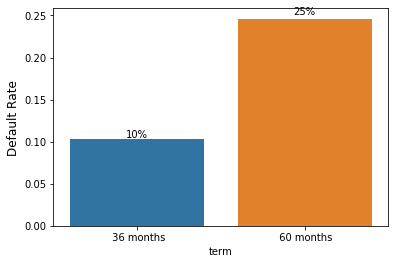

In [33]:
# create function for univariate plot analysis 

def univar_plot(univar):
    ax=sns.barplot(x=univar,y='loan_status', data=loan_Default.sort_values(univar),ci=None,dodge=False)
    plt.ylabel('Default Rate', fontsize=12)
       
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
    plt.show()

# compare default and term    
univar_plot('term')

From the above plot it is clear that Default rate is higher for long term loans i.e 60 months term .

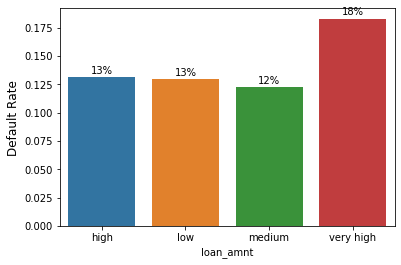

In [34]:
# compare default and loan_amnt

univar_plot('loan_amnt')

Default rate is highest when the loan amount is very high.

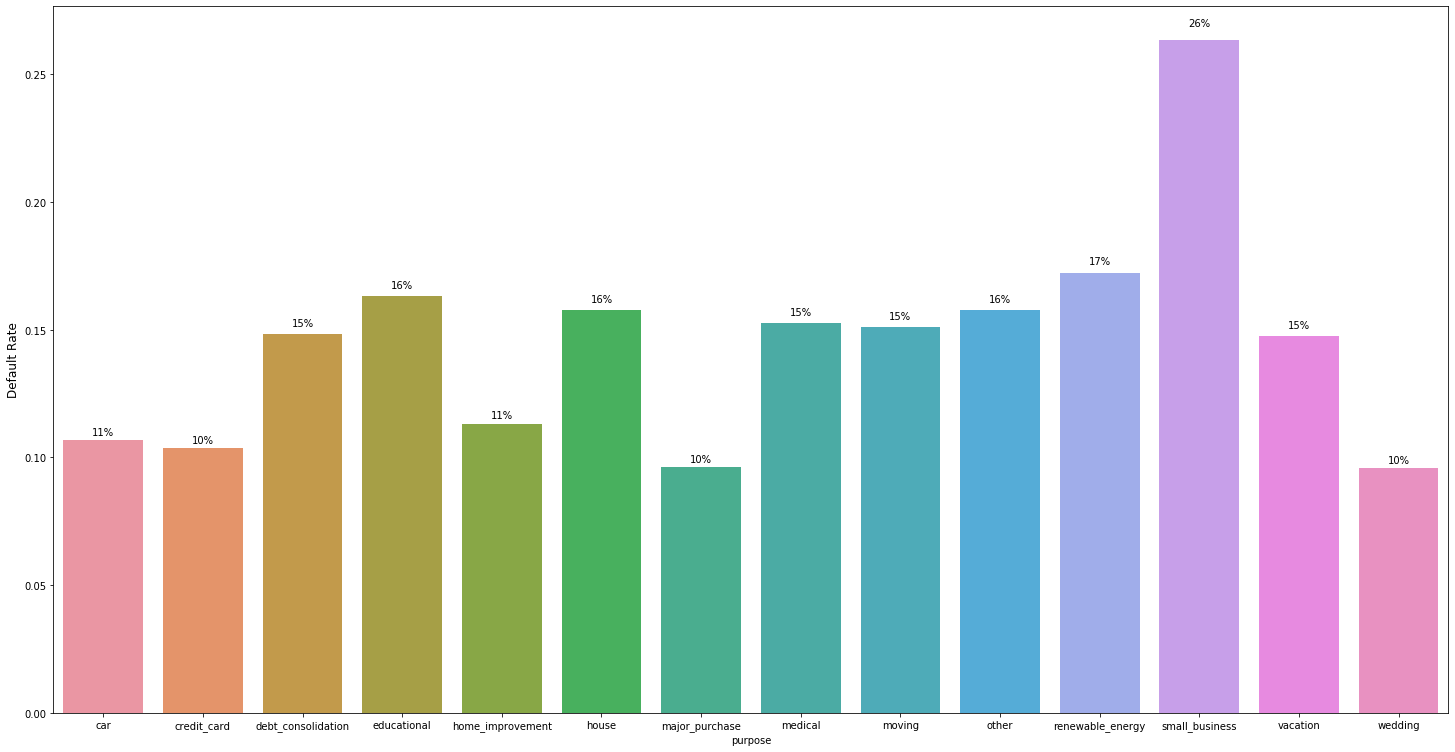

In [36]:
# compare default and purpose 

plt.figure(figsize=(25, 13))
univar_plot('purpose')


Default rate is highest when the purpose is 'small business'.

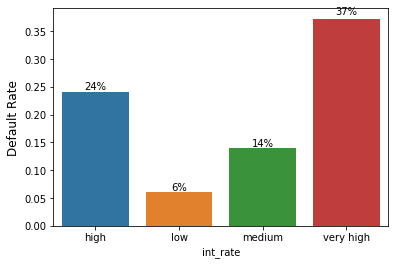

In [37]:
# compare default and int_rate

univar_plot('int_rate')

Default rate is highest when the interest rate is very high.

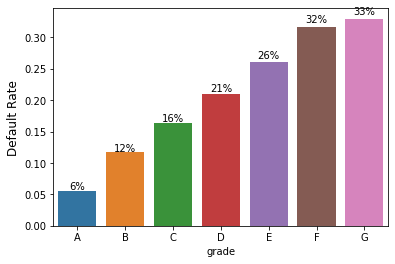

In [38]:
# compare default and grade


univar_plot('grade')

Default rate gradually increases from grade A to G

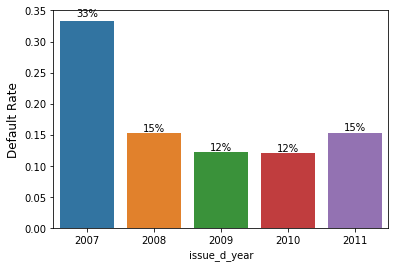

In [39]:
# compare default and issue_d_year

univar_plot('issue_d_year')

Default rate is highest in 2007 .

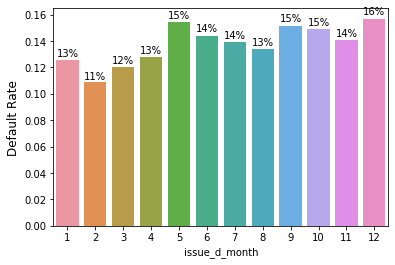

In [40]:
# compare default and issue_d_month

univar_plot('issue_d_month')

Default rate is almost similar across all the months. Hence it cannot be considered as an indicator of loan default.

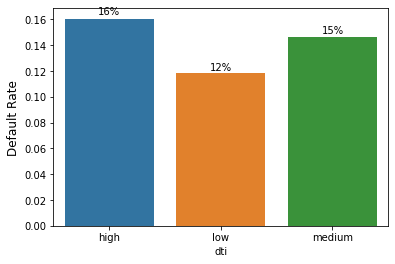

In [41]:
# compare default and dti

univar_plot('dti')

Default rate is gradually increasing from low to high dti.

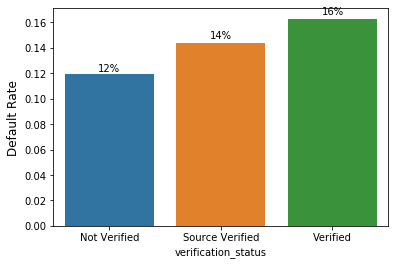

In [42]:
# compare default and verification_status

univar_plot('verification_status')

From above plot, even verified loans are defaulted .

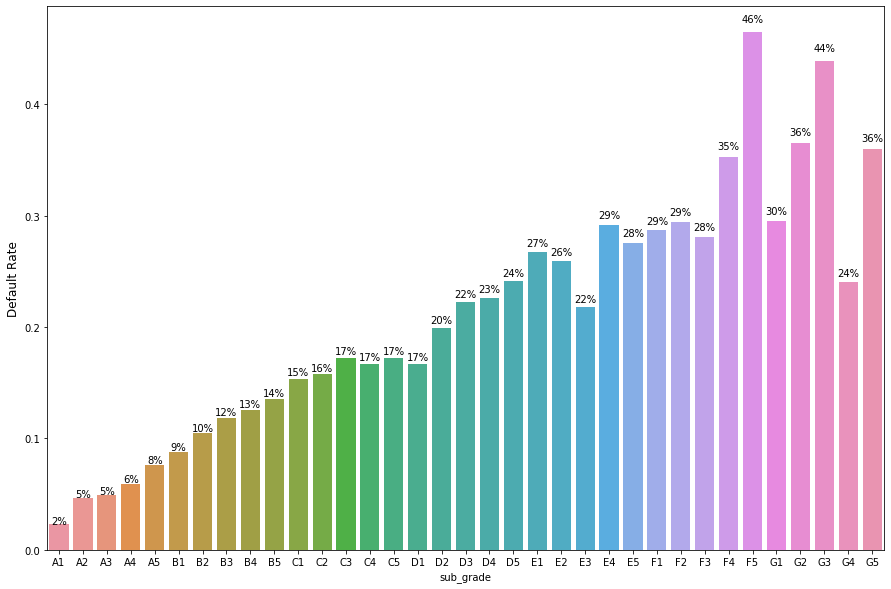

In [43]:
# compare default and sub_grade

plt.figure(figsize=(15, 10))
univar_plot('sub_grade')

As the risk of the sub grade increases loan default also increases.

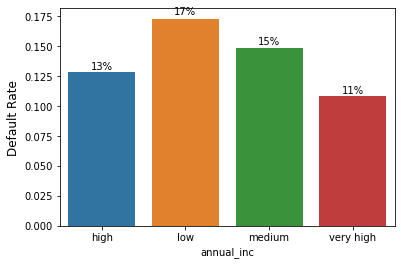

In [44]:
# compare default and annual_inc

univar_plot('annual_inc')

Default rate is highest when the annual income is low.

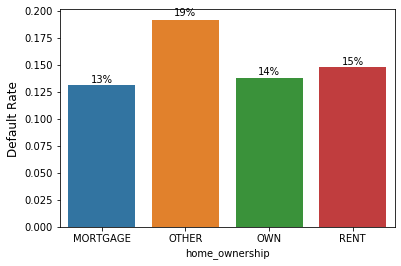

In [45]:
# compare default and home_ownership

univar_plot('home_ownership')

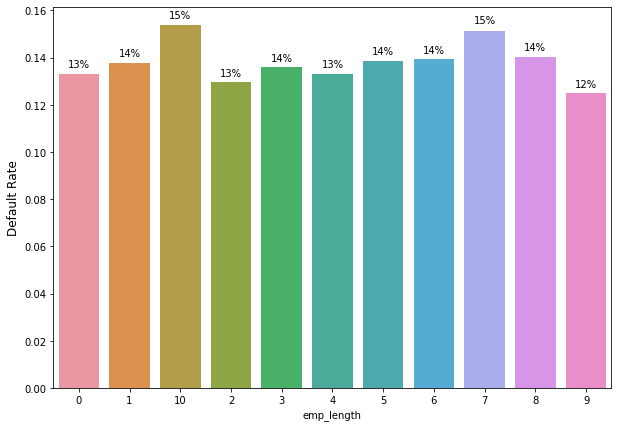

In [46]:

# compare default and emp_length 
plt.figure(figsize=(10, 7))
univar_plot('emp_length')

Default rate is almost similar across all the 'emp_length'. Hence it cannot be considered as an indicator of loan default.

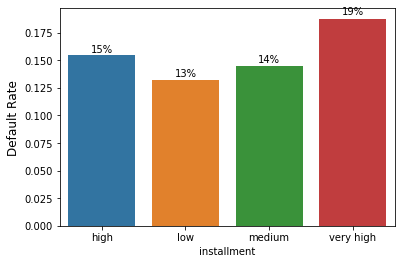

In [47]:
# compare default and installment 

univar_plot('installment')

Default rate is highest if the installment range is very high.

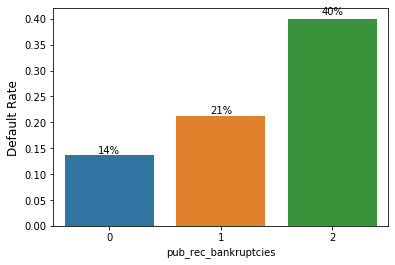

In [48]:
# compare default and pub_rec_bankruptcies 

univar_plot('pub_rec_bankruptcies')

Default rate is highest if the pub_rec_bankruptcies is 2.

### Bivariate Analysis

For bivariate analysis , top 5 categories of the variable 'purpose' are considered.

In [49]:
# take top 5 purpose

loan_Default.purpose.value_counts()


debt_consolidation    16911
credit_card            4626
other                  3462
home_improvement       2614
major_purchase         1973
car                    1395
small_business         1351
wedding                 865
medical                 622
moving                  523
vacation                332
house                   330
educational             276
renewable_energy         87
Name: purpose, dtype: int64

In [50]:
# create a data frame which has top 5 categories of 'purpose'

top5 = ['debt_consolidation','credit_card','other','home_improvement','major_purchase']

loan_Bivar=loan_Default[loan_Default['purpose'].isin(top5)].reset_index(drop=True)
loan_Bivar.shape

(29586, 22)

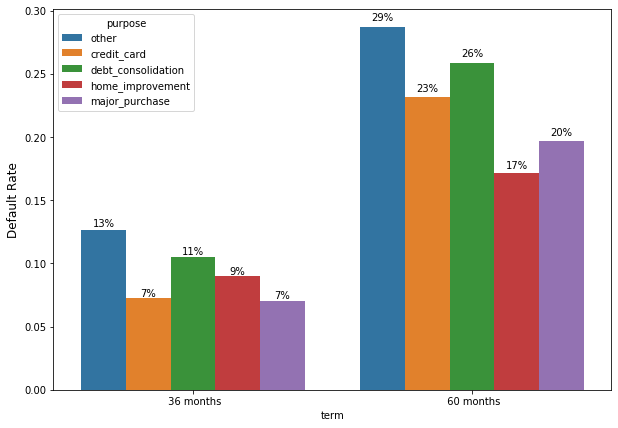

In [51]:
#function for bivariate analysis

def bivar_plot(bivar):
    fig = plt.figure(figsize=(10,7))
    ax=sns.barplot(x=bivar, y='loan_status', hue='purpose', data=loan_Bivar.sort_values(bivar),ci=None)
    plt.ylabel('Default Rate', fontsize=12)
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x, y = p.get_xy() 
        ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
    plt.show
    
bivar_plot('term')    
#sns.barplot(x='term', y='loan_status', hue='purpose', data=loan_Default)
#plt.show

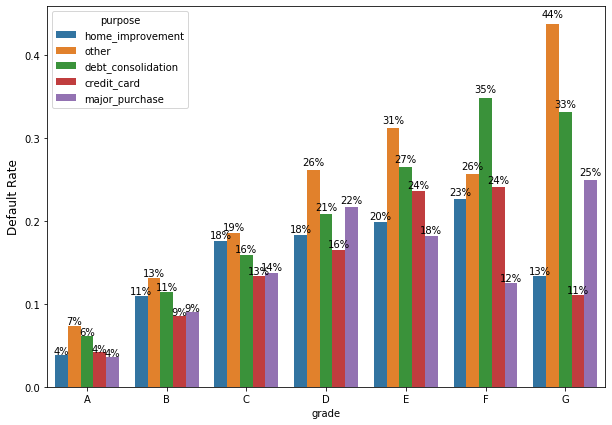

In [52]:
bivar_plot('grade')

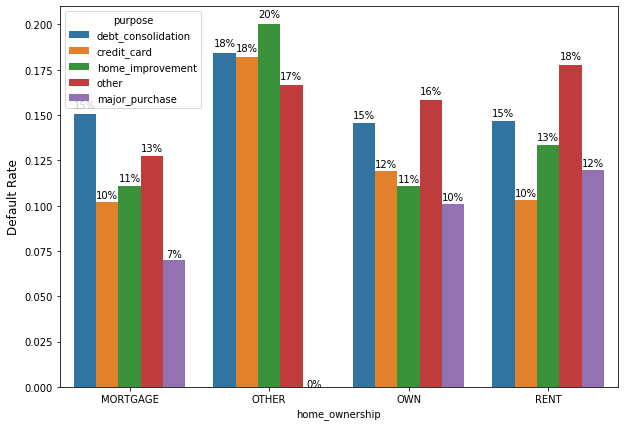

In [53]:
bivar_plot('home_ownership')

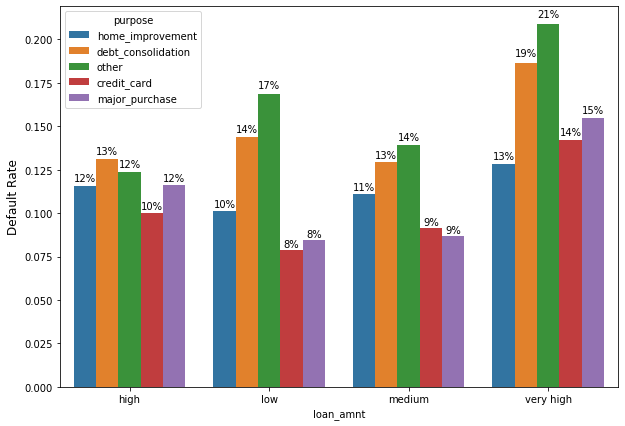

In [54]:
bivar_plot('loan_amnt')

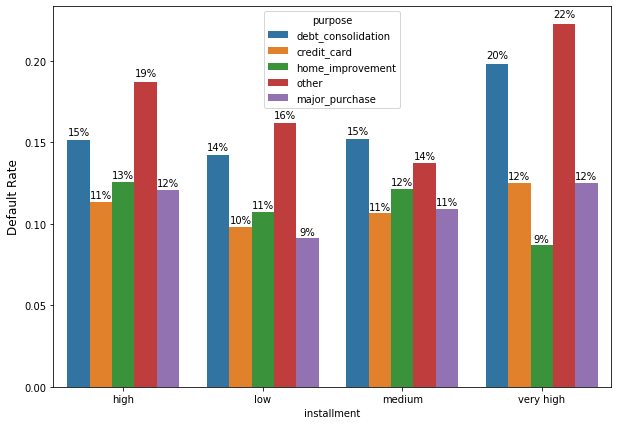

In [55]:
bivar_plot('installment')

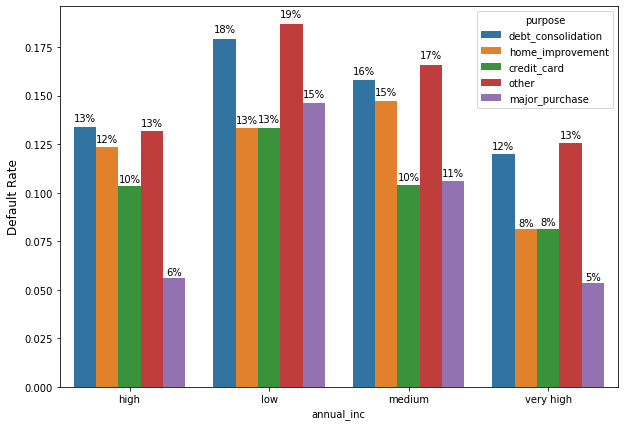

In [56]:
bivar_plot('annual_inc')

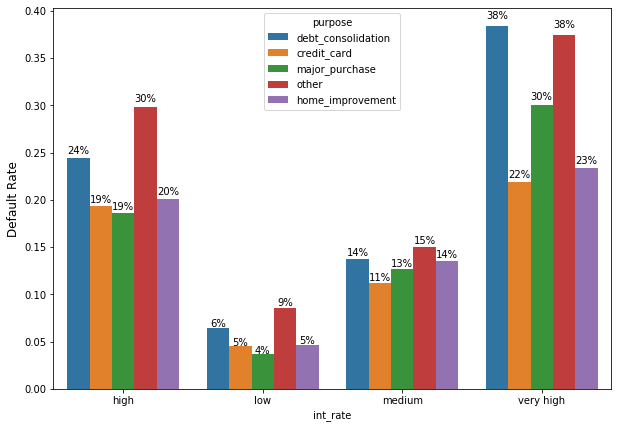

In [57]:
bivar_plot('int_rate')

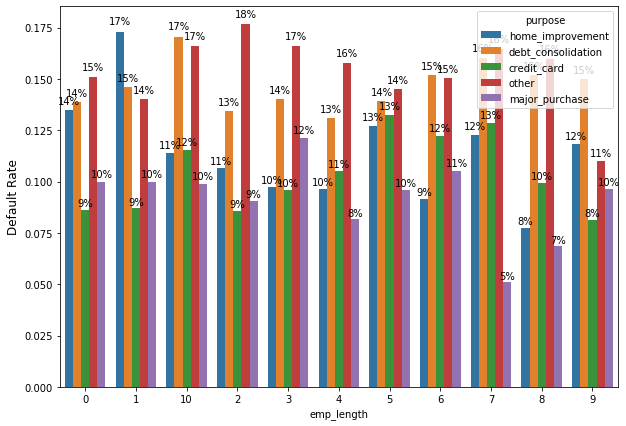

In [58]:
bivar_plot('emp_length')

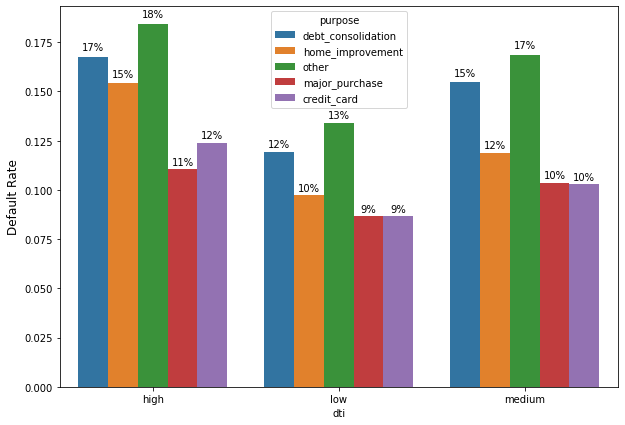

In [59]:
bivar_plot('dti')

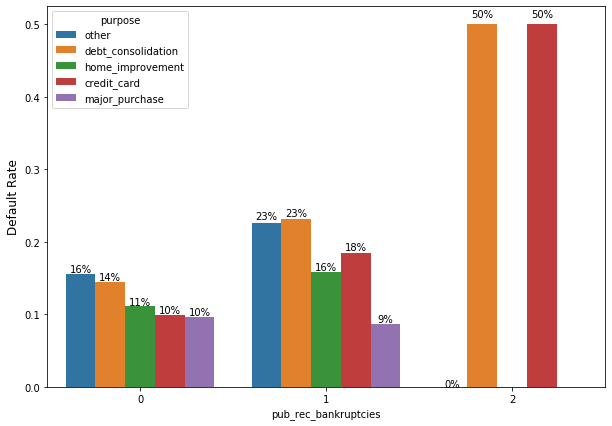

In [60]:
bivar_plot('pub_rec_bankruptcies')

#### Observation : 
    1 . Default rate is highest if the'purpose' is 'others'
        and a. term is 60 months
            b. 'Grade' is G
            c. 'loan amount' is very high
            d. 'Annual income' is low
            e. 'dti' is high
            f. 'interest rate' is very high
            h. 'installment' is very high
            
    2. Default rate is highest if 'purpose' is home improvement        
       and 'home_ownership' is 'others'
        
    3.  Default rate is highest if the 'purpose' is 'debt consolidation' 
        and a.'interest rate' is very high
            b. 'pub_rec_bankruptcies' is 2.  
    4.  Default rate is highest if the 'purpose' is 'credit card' and 'pub_rec_bankruptcies' is 2.

In [61]:
# To choose best Categorical variables

# difference in default rate = highest default rate - lowest default rate


def cat_default(x):
    
    default_cat = loan_Bivar.groupby(x).loan_status.mean().sort_values(ascending=False)
    print(x +' =',(round(default_cat[0] - default_cat[-1], 2)))
    
cat_var =['term','loan_amnt','grade','installment','home_ownership','verification_status','int_rate',
              'annual_inc','dti','emp_length','sub_grade','purpose']  

print('Difference in default rate of categorical variable : ')
for i in cat_var:
    cat_default(i)
    



Difference in default rate of categorical variable : 
term = 0.15
loan_amnt = 0.06
grade = 0.26
installment = 0.04
home_ownership = 0.04
verification_status = 0.04
int_rate = 0.29
annual_inc = 0.06
dti = 0.05
emp_length = 0.03
sub_grade = 0.45
purpose = 0.06
